In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from fastai.data.external import untar_data, URLs
from os.path import join
from PIL import Image

In [4]:
datapath = untar_data(URLs.IMAGEWOOF)

In [7]:
data = pd.read_csv(join(datapath, 'noisy_imagewoof.csv'))
data.head()

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02115641/n02115641_3995.JPEG,n02115641,n02115641,n02115641,n02115641,n02115641,False
1,train/n02115641/n02115641_843.JPEG,n02115641,n02115641,n02105641,n02115641,n02088364,False
2,train/n02115641/n02115641_2953.JPEG,n02115641,n02115641,n02115641,n02111889,n02099601,False
3,train/n02115641/n02115641_6458.JPEG,n02115641,n02115641,n02115641,n02093754,n02115641,False
4,train/n02115641/n02115641_19414.JPEG,n02115641,n02115641,n02115641,n02115641,n02088364,False


In [60]:
data.isna().sum()

path               0
noisy_labels_0     0
noisy_labels_1     0
noisy_labels_5     0
noisy_labels_25    0
noisy_labels_50    0
is_valid           0
dtype: int64

In [13]:
train_data = data[data.path.apply(lambda x: x.startswith('train'))]
val_data = data[data.path.apply(lambda x: x.startswith('val'))]
train_data.shape, val_data.shape

((9025, 7), (3929, 7))

In [22]:
total_cnt = pd.value_counts(data.path.apply(lambda x: x.split('/')[1]))
train_cnt = pd.value_counts(train_data.path.apply(lambda x: x.split('/')[1]))
val_cnt = pd.value_counts(val_data.path.apply(lambda x: x.split('/')[1]))
pd.concat([total_cnt, train_cnt, val_cnt], axis=1, keys=['data', 'train_split', 'val_split'])

,data,train_split,val_split
n02115641,1350,940,410
n02086240,1350,941,409
n02088364,1350,932,418
n02087394,1350,942,408
n02105641,1350,928,422
n02111889,1350,921,429
n02099601,1350,949,401
n02096294,1350,943,407
n02093754,1350,949,401
n02089973,804,580,224


In [55]:
def get_width(img_path):
    image = Image.open(img_path)
    return image.size[0]
def get_height(img_path):
    image = Image.open(img_path)
    return image.size[1]
def get_mode(img_path):
    image = Image.open(img_path)
    return image.mode

In [62]:
widths = data.path.apply(lambda x: get_width(join(datapath, x)))
heights = data.path.apply(lambda x: get_height(join(datapath, x)))
modes = data.path.apply(lambda x: get_mode(join(datapath, x)))
cls = data.path.apply(lambda x: x.split('/')[1])
imgs_info = pd.concat([widths, heights, modes, cls], axis=1, keys=['width', 'height', 'mode', 'cls'])
imgs_info.head()

,width,height,mode,cls
0,500,375,RGB,n02115641
1,500,375,RGB,n02115641
2,360,284,RGB,n02115641
3,120,90,RGB,n02115641
4,500,375,RGB,n02115641


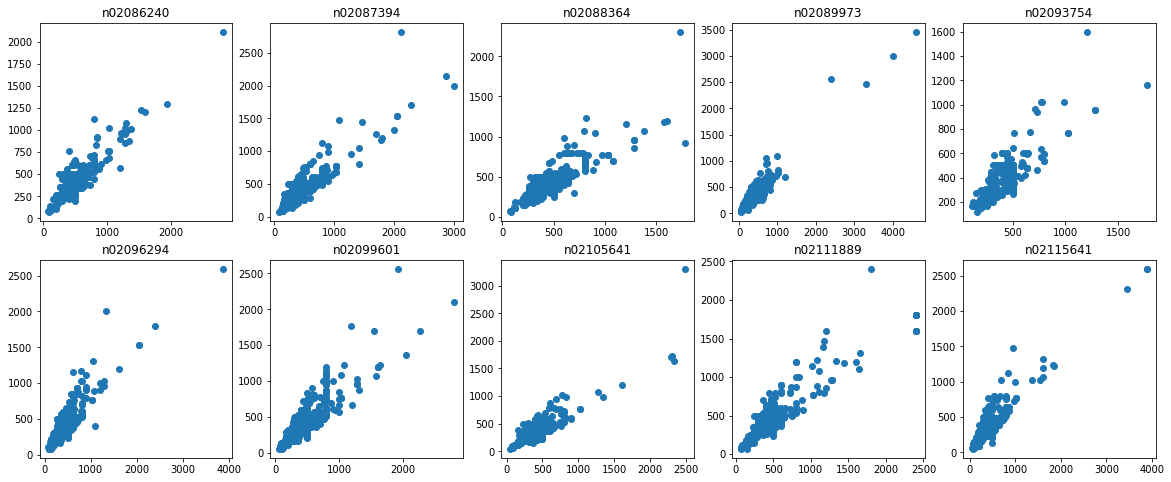

In [84]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
groups = imgs_info.groupby('cls').groups
for i, (group_name, group_indxs) in enumerate(groups.items()):
    group = imgs_info.loc[group_indxs]
    axs[i//5][i%5].scatter(group.width, group.height)
    axs[i//5][i%5].set_title(group_name)

In [86]:
imgs_info.groupby('cls').median()

,width,height
cls,,
n02086240,500.0,375.0
n02087394,500.0,375.0
n02088364,500.0,375.0
n02089973,298.0,250.0
n02093754,500.0,375.0
n02096294,500.0,375.0
n02099601,500.0,375.0
n02105641,480.0,375.0
n02111889,500.0,375.0
